# Libraries

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import re

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

from collections import Counter

from wordcloud import WordCloud

nltk.download ('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\handw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\handw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\handw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\handw\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\handw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load Dataset

In [2]:
newsgroups_data = fetch_20newsgroups(subset='train', remove=('headers','footers','quotes'))

df = pd.DataFrame({
    'text':newsgroups_data.data,
    'category':newsgroups_data.target
})

df['category_name'] = df['category'].apply(lambda x: newsgroups_data.target_names[x])


In [3]:
df.head()

text  category  \
0  I was wondering if anyone out there could enli...         7   
1  A fair number of brave souls who upgraded thei...         4   
2  well folks, my mac plus finally gave up the gh...         4   
3  \nDo you have Weitek's address/phone number?  ...         1   
4  From article <C5owCB.n3p@world.std.com>, by to...        14   

           category_name  
0              rec.autos  
1  comp.sys.mac.hardware  
2  comp.sys.mac.hardware  
3          comp.graphics  
4              sci.space

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           11314 non-null  object
 1   category       11314 non-null  int64 
 2   category_name  11314 non-null  object
dtypes: int64(1), object(2)
memory usage: 265.3+ KB


In [5]:
duplicates = df.duplicated(subset=['text']).sum()
print (f"number of duplicate rows: {duplicates}")

df = df.drop_duplicates(subset=['text'], keep='first').reset_index(drop=True)
print (f"Number of duplicate rows after removal: {df.duplicated(subset=['text']).sum()}")

number of duplicate rows: 320
Number of duplicate rows after removal: 0


In [6]:
df['category_name'].value_counts()

category_name
soc.religion.christian      592
rec.sport.hockey            585
sci.crypt                   582
rec.motorcycles             581
comp.windows.x              581
sci.med                     577
comp.sys.ibm.pc.hardware    577
sci.space                   576
rec.sport.baseball          575
sci.electronics             573
misc.forsale                572
comp.graphics               569
comp.os.ms-windows.misc     567
rec.autos                   563
comp.sys.mac.hardware       559
talk.politics.mideast       549
talk.politics.guns          533
alt.atheism                 469
talk.politics.misc          453
talk.religion.misc          361
Name: count, dtype: int64

# Level 1 : The Language Kingdom’s Gateway – Understanding the Terrain

count    10994.000000
mean      1251.595870
std       4091.494705
min          0.000000
25%        253.000000
50%        506.000000
75%       1009.000000
max      74878.000000
Name: text_length, dtype: float64


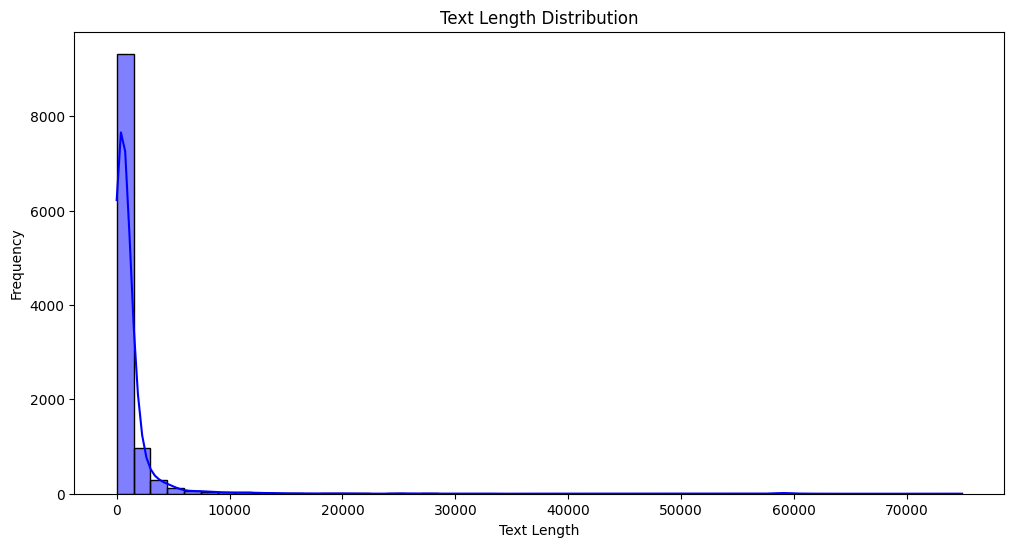

In [7]:
# calculate text length
df['text_length'] = df['text'].apply(len)
print (df['text_length'].describe())

# plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='blue')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

- **Overall Text Length** : The average text length is around 1252 characters, with a standard deviation of 4091 characters. This indicates a wider range of text lengths in our data. There are some very short texts (minimuim length is 0 characters) and some very long texts (maximum length is 74878 characters)
- **Distribution Shape** : This histogram suggests a right-skewed distribution. The majority of the texts are likely shorter than the average length, with a tail extending towards longer texts.

In [8]:
#remove 0 characters from dataset
df = df[df['text_length'] > 0]. reset_index(drop=True)

In [9]:
print(df.columns)

Index(['text', 'category', 'category_name', 'text_length'], dtype='object')


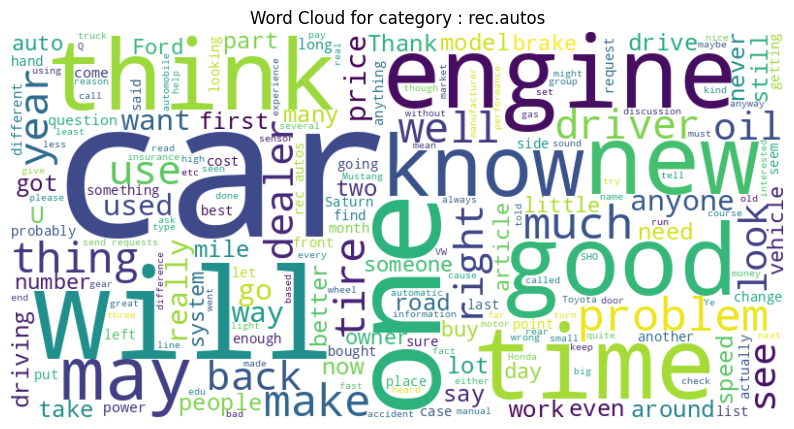

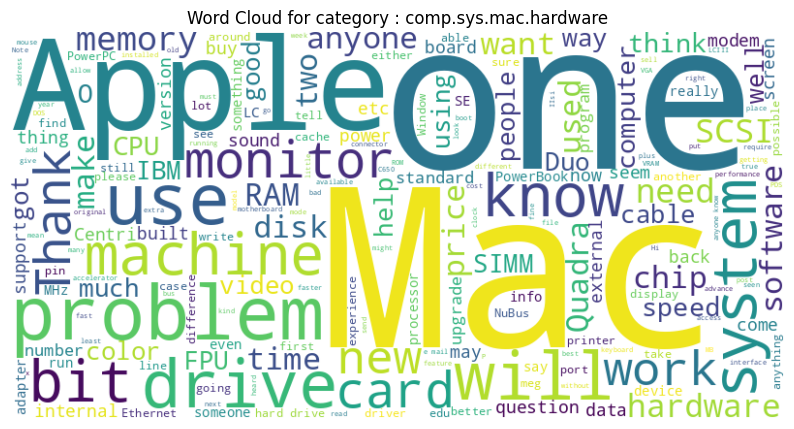

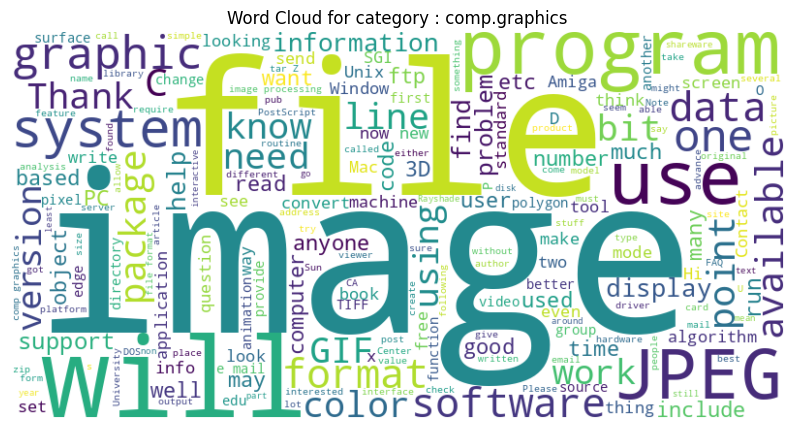

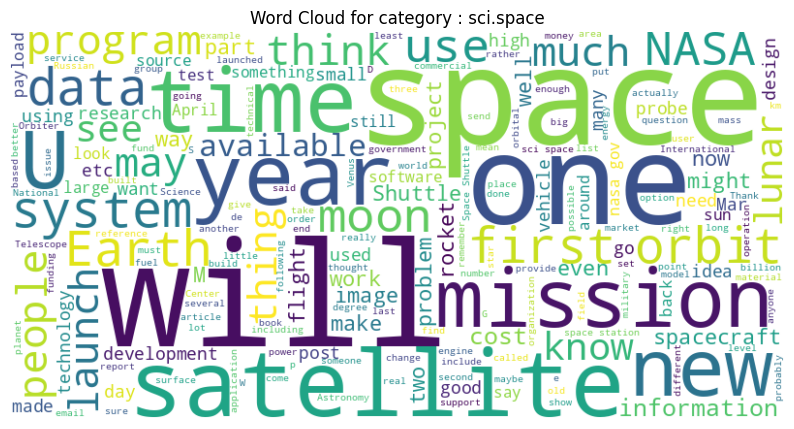

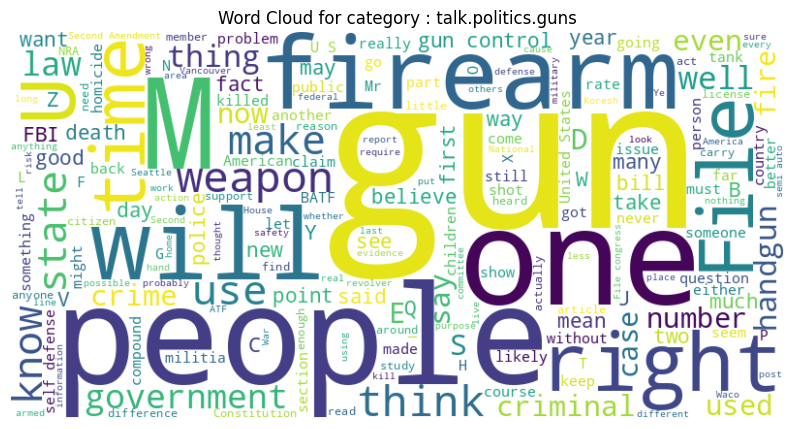

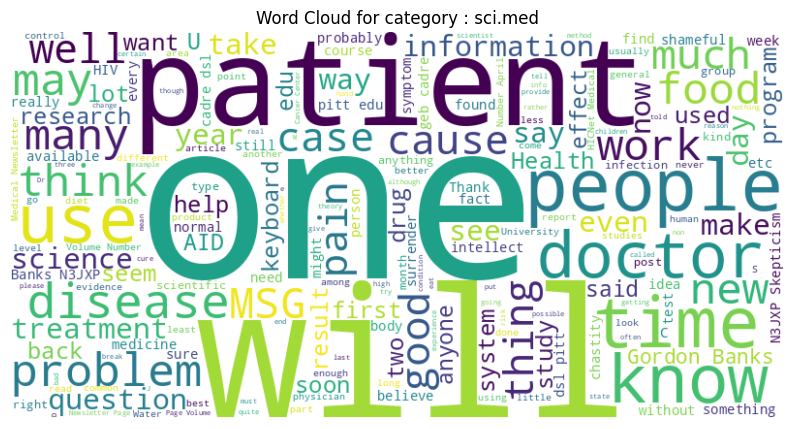

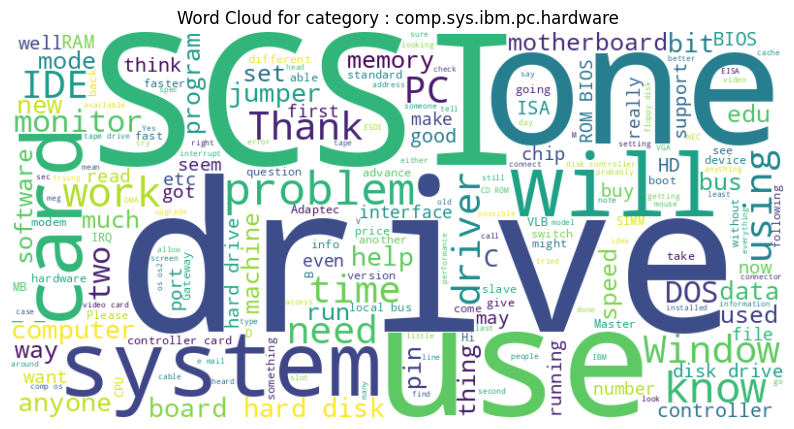

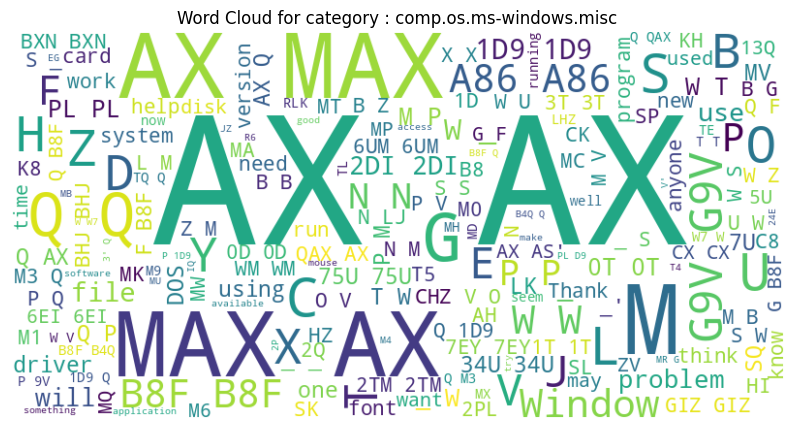

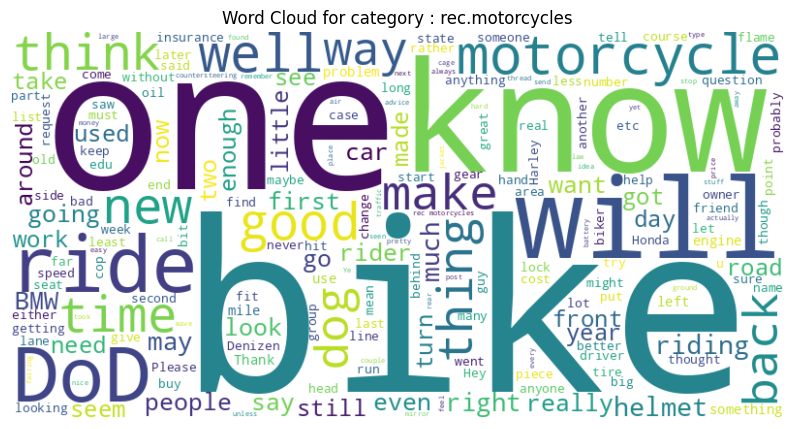

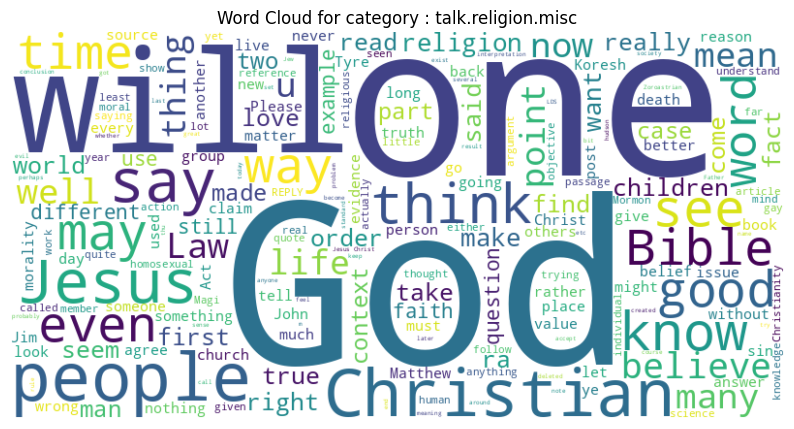

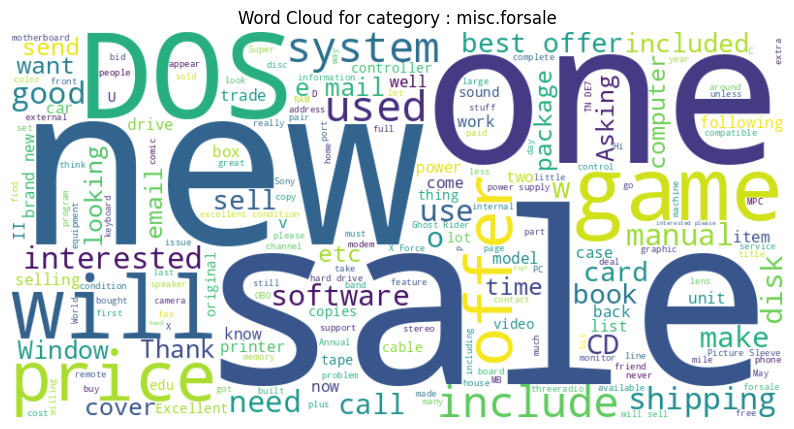

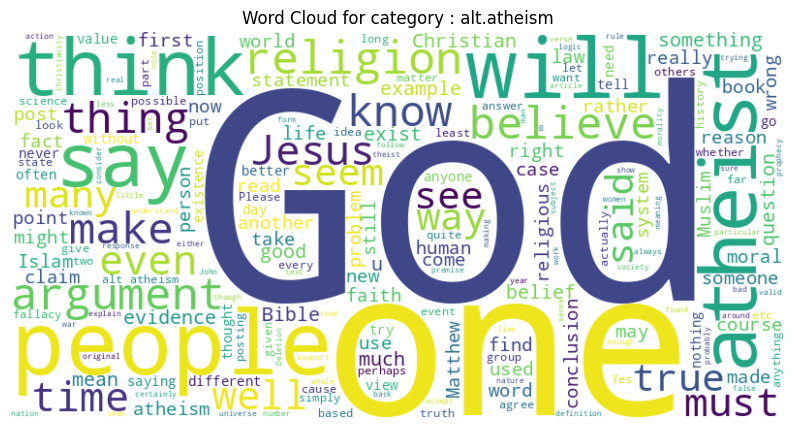

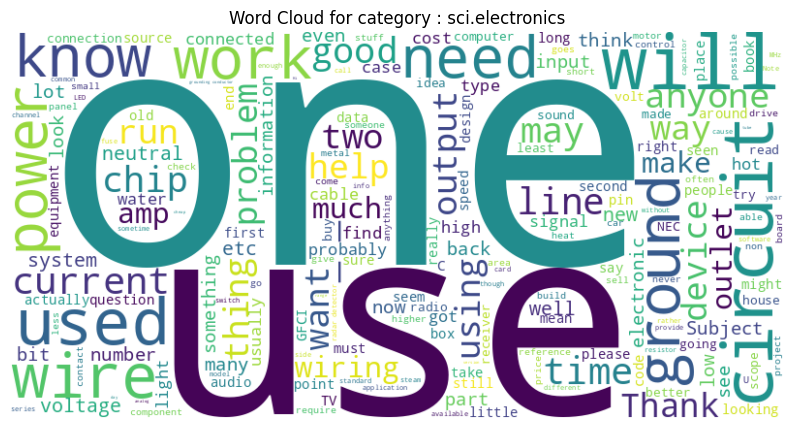

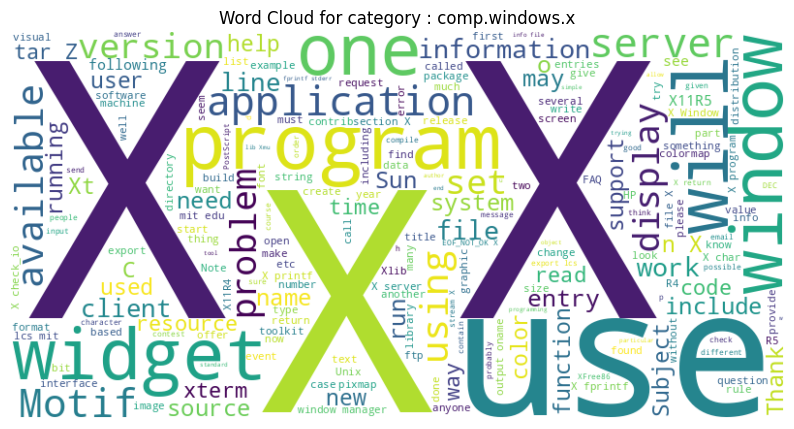

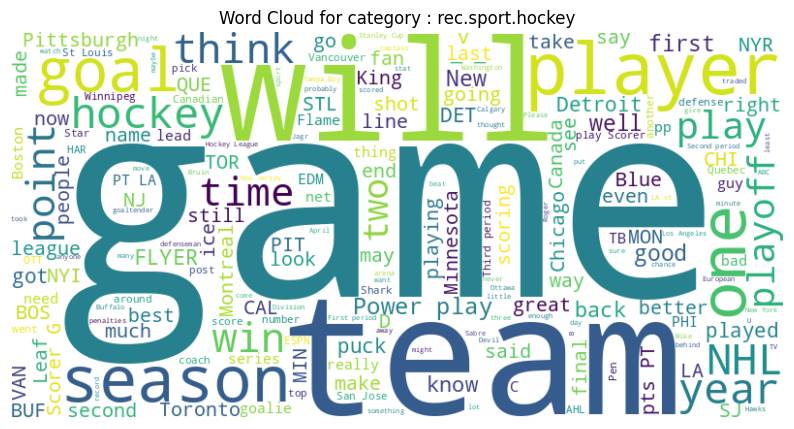

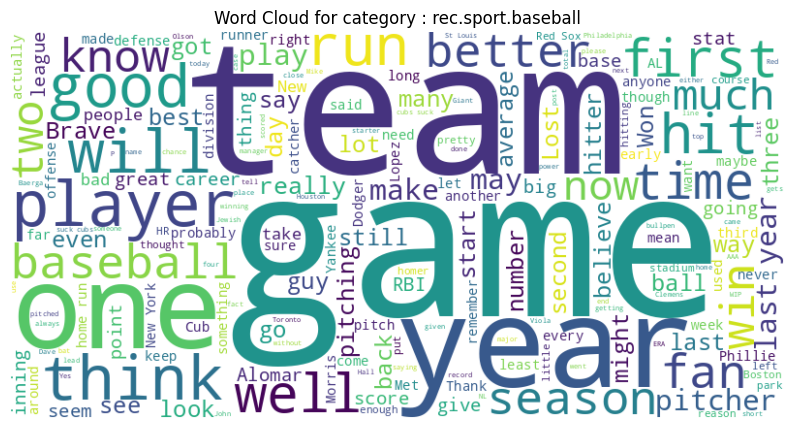

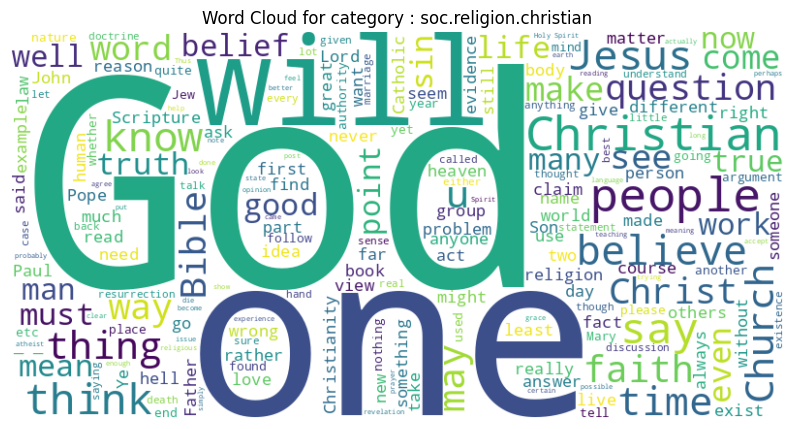

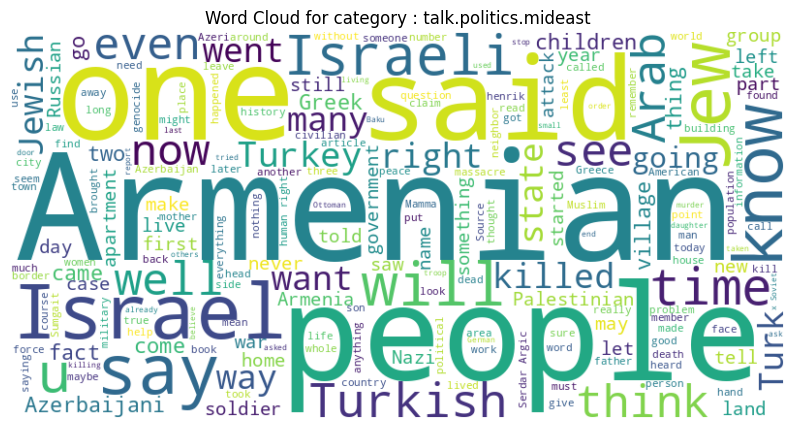

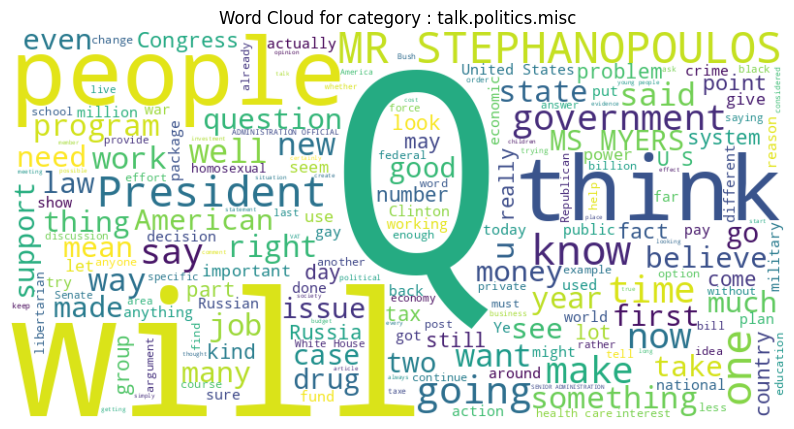

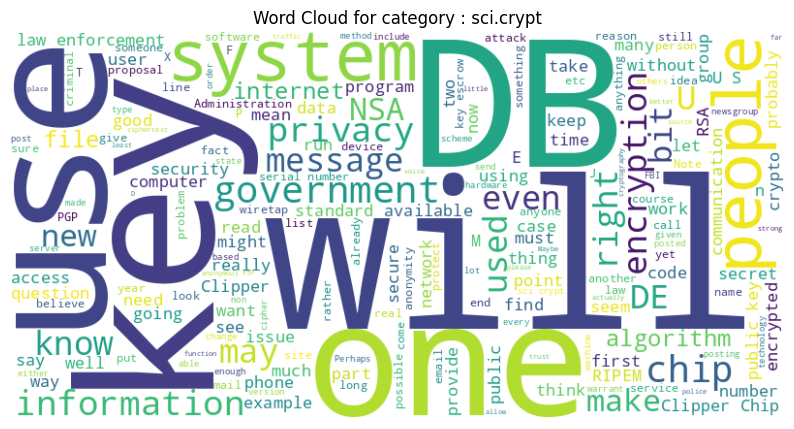

In [10]:
#Get unique categories in the dataset
categories = df['category_name'].unique()

# Wordcloud for each classes
for category in categories:
    category_text = ' '.join(df[df['category_name'] == category]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for category : {category}")
    plt.show()


### Insight

1. rec.autos:
- Focuses on discussions about cars, driving, and automotive maintenance.
- Common topics include buying and selling cars, car repairs, driving experiences, and vehicle specifications.
2. comp.sys.mac.hardware:
- Primarily centered around Apple Macintosh computers and their hardware components.
- Discussions often involve troubleshooting, hardware compatibility issues, and experiences with different hardware components.
3. comp.graphics:
- Focuses on computer graphics, image processing, and related software.
- Key topics include image formats, software tools, 3D graphics, and data visualization.
4. sci.space:
- Primarily dedicated to space exploration, astronomy, and related technologies.
- Common discussions involve space missions, satellites, rockets, planets, and NASA.
5. talk.politics.guns:
- Focuses on gun control, gun violence, and the Second Amendment.
- Discussions often center on gun laws, mass shootings, self-defense, and gun rights.
6. sci.med:
- Centers around medical science, health, and diseases.
- Common topics include medical research, patient experiences, treatments, and drug information.
7. comp.sys.ibm.pc.hardware:
- Focuses on discussions about IBM PC hardware and related components.
- Users often discuss hard drives, memory, motherboards, controllers, and DOS-related topics.
- Troubleshooting and hardware performance optimization are also frequently addressed.
8. comp.os.ms-windows.misc:
- Focuses on Microsoft Windows operating systems and related software.
- Common topics include Windows versions, software compatibility, driver issues, troubleshooting, and usage tips.
9. rec.motorcycles:
- Focuses on motorcycles, riding experiences, and motorcycle maintenance.
- Topics include motorcycle brands, models, repairs, road trips, and safety tips.
10. talk.religion.misc:
- Centers on religion, faith, and spirituality.
- Common topics include God, Jesus, the Bible, belief, faith, and morality.
11. misc.forsale:
- Focuses on buying, selling, and trading various items.
- Common topics include electronics, computer hardware, books, games, and personal items.
12. alt.atheism:
- Focuses on atheism, religion, and spirituality.
- Discussions often involve God, religion, belief, faith, and the debate between atheism and Christianity, as well as philosophical and scientific topics.
13. sci.electronics:
- Focuses on electronics and electrical engineering.
- Key topics include circuits, components, power, signals, and troubleshooting.
- Users often discuss building electronic projects and repairing electronic devices.
14. comp.windows.x:
- Focused on the X Windows system, a windowing system for Unix-like operating systems.
- Common topics include X server configuration, window managers, applications, and programming with X libraries.
15. rec.sport.hockey:
- Centers on ice hockey discussions.
- Common topics include NHL teams, players, games, scores, playoffs, strategies, and game analysis.
16. rec.sport.baseball:
- Primarily focused on baseball discussions.
- Topics include teams, players, games, scores, statistics, strategies, and game analysis.
17. soc.religion.christian:
- Focuses on discussions about Christianity and Christian beliefs.
- Topics include God, Jesus, the Bible, faith, morality, and the role of religion in daily life.
18. talk.politics.mideast:
- Primarily focused on discussions about the Middle East, particularly the Israeli-Palestinian conflict and related geopolitical issues.
- Common topics include Israel, Palestine, Arabs, Jews, war, peace, human rights, political ideologies, and international relations.
19. talk.politics.misc:
- Focused on US politics.
- Topics include government, elections, politicians, current events, social issues, and economic policies.
20. sci.crypt:
- Focuses on cryptography and security.
- Common topics include encryption, algorithms, security protocols, privacy, and the ethical implications of cryptography.
----------------------------------------------
The analyzed newsgroups exhibit a diverse range of topics, spanning technology, science, sports, politics, religion, and miscellaneous discussions:

- "comp" newsgroups (e.g., "comp.sys.mac.hardware," "comp.graphics") focus on technical discussions related to hardware, software, and computing.
- "sci" newsgroups (e.g., "sci.space," "sci.med") delve into scientific subjects, including space exploration, medicine, and electronics.
- "rec" newsgroups (e.g., "rec.sport.hockey," "rec.motorcycles") are centered around recreational interests, particularly sports and hobbies.
- "talk" newsgroups (e.g., "talk.politics.misc," "talk.religion.misc") are engaged in debates and discussions on political and religious issues.
- Miscellaneous newsgroups (e.g., "misc.forsale," "alt.atheism") cover topics ranging from classified ads to philosophical debates.  

Each of these categories reveals a unique set of topics and discussions, reflecting the broad spectrum of interests and concerns within the newsgroups.

# Level 2: Power-Ups & Secret Moves – Building NLP Pipelines

In [23]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def preprocess_text(text):
    text = re.sub (r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    tokens = word_tokenize(text.lower())
    post_tags = pos_tag(tokens)
    tokens = [
        lemmatizer.lemmatize(word, get_wordnet_pos(tag))
        for word, tag in post_tags
        if word not in stop_words and len(word) > 1
    ]
    return " ".join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)
df[['category_name', 'text','cleaned_text']].head()

category_name                                               text  \
0              rec.autos  I was wondering if anyone out there could enli...   
1  comp.sys.mac.hardware  A fair number of brave souls who upgraded thei...   
2  comp.sys.mac.hardware  well folks, my mac plus finally gave up the gh...   
3          comp.graphics  \nDo you have Weitek's address/phone number?  ...   
4              sci.space  From article <C5owCB.n3p@world.std.com>, by to...   

                                        cleaned_text  
0  wonder anyone could enlighten car saw day door...  
1  fair number brave soul upgrade si clock oscill...  
2  well folk mac plus finally give ghost weekend ...  
3  weitek address phone number like get informati...  
4  article owcb world std com tombaker world std ...

In [ ]:
vectorizer = CountVectorizer(max_features=50)
X = vectorizer.fit_transform(df['cleaned_text'])
word_frequencies = pd.DataFrame({
    'Word': vectorizer.get_feature_names_out(),
    'Frequency': X.toarray().sum(axis=0)
}).sort_values(by='Frequency', ascending=False)

print ('\nTop words :')
print (word_frequencies)


Top words :
       Word  Frequency
1        ax      62515
42      use       6782
26      one       6759
48    would       6157
10      get       5830
33      say       4786
21      max       4680
16     know       4563
19     make       4227
27   people       4130
12       go       4103
17     like       4057
38    think       3866
39     time       3679
0      also       3348
14     good       3312
34      see       3034
45     well       2912
47     work       2860
49     year       2844
25      new       2702
36     take       2685
35   system       2656
7      file       2620
4     could       2535
3      come       2436
5       edu       2422
43     want       2420
22      may       2415
18     look       2353
6      even       2326
31    right       2326
29  problem       2308
11     give       2297
24     need       2292
8      find       2286
37    thing       2276
44      way       2270
41      two       2237
9     first       2225
23     much       2099
20     many       209

In [28]:
bigram_vectorizer = CountVectorizer(max_features=50, ngram_range=(2, 2))
bigram_X = bigram_vectorizer.fit_transform(df['cleaned_text'])

bigram_frequencies = pd.DataFrame({
    'Bigram': bigram_vectorizer.get_feature_names_out(),
    'Frequency':bigram_X.toarray().sum(axis=0)
}).sort_values(by='Frequency', ascending=False)

print ("\nTop Bigrams: ")
print (bigram_frequencies)


Top Bigrams: 
               Bigram  Frequency
4               ax ax      56397
26             max ax       4337
5              ax max       4321
10              db db        520
47         would like        430
28  mr stephanopoulos        341
11              di di        314
2         anyone know        303
43       united state        298
30           new york        287
32              pl pl        272
22          look like        271
19          last year        269
48           year ago        259
20    law enforcement        228
39     thanks advance        225
37     something like        219
35             qax ax        209
27            mit edu        205
0       anonymous ftp        203
49           year old        199
25        many people        196
8        clipper chip        195
18         hard drive        186
13              ei ei        180
41              tm tm        180
24          make sure        179
45              wm wm        177
23        los angeles       

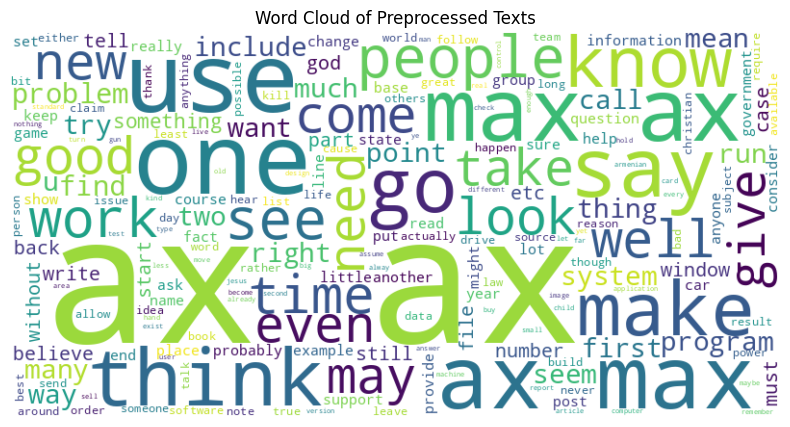

In [27]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['cleaned_text']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Preprocessed Texts')
plt.show()